In [5]:
from keithley2600 import Keithley2600
from pmu_som import communicator, pmu_ctrl, pmu_cal
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd


try:
    del(p.c)
except:
    pass

k = Keithley2600('GPIB0::17::INSTR', visa_library='')
#k.smua.source.output = k.smua.OUTPUT_OFF

k.smua.reset()
k.smub.reset()

# p = communicator.communicator(False)
p = pmu_ctrl.pmu()



In [8]:
p.read_dac_regs(reg="X1")

,Offset,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,42130,32768,32768,32768,32768,32768,32768,48289,0,65535,65535
1,42130,32768,32768,32768,32768,32768,32768,0,0,65535,65535
2,42130,32768,32768,32768,32768,32768,32768,0,0,65535,65535
3,42130,32768,32768,32768,32768,32768,32768,0,0,65535,65535


In [7]:
p.channels[0].write_dac(
    data=0xBCA1,
    dac_reg="CLL_I",
    reg="X1"
)

In [9]:
p.write_all_PMU_REGS(0x1E060)

k.display.screen            = k.display.SMUA
k.display.smua.measure.func = k.display.MEASURE_DCVOLTS
    
k.smua.measure.rangev       = 20
k.smua.measure.autorangei   = k.smua.AUTORANGE_ON
#k.smua.measure.autorangev   = k.smua.AUTORANGE_ON
k.smua.measure.nplc         = 1    
k.smua.source.func          = k.smua.OUTPUT_DCAMPS
k.smua.source.leveli        = 0
k.smua.source.limiti        = 1e-3
k.smua.source.limitv        = 20
k.smua.source.output        = k.smua.OUTPUT_ON

p.change_sys_ctrl({
        "DUTGND/CH" : 1,
        "INT10K"    : 1,
        "GAIN"      : 2,
        "TMP ENABLE": 1,
        "TMP"       : 3,
        'CL': 1
})

In [11]:
p.channels[0].change_pmu_reg({
        "CH EN": 1,      # Channel enable
        "FORCE": 0,      # FV
        "C": 3,
        "MEAS": 3,       # VSens
        "SS0": 1,
        "SF0": 1,        # 1,1
        "FIN": 1,
        'CL': 1
    })
        
# Enable beeper and play chord
k.beeper.enable = k.beeper.ON
k.play_chord(notes=("G6", "F6", "C6", "C6"), durations=0.1)
k.beeper.enable = k.beeper.OFF
k.smua.source.output = k.smua.OUTPUT_ON

In [16]:
data_list = []
measure_points = np.linspace(0, 0xFFFF, 20)
for d in  measure_points:
        # Calculate the data value for the current index
       # data = i * step_size

        # Print the data being written to the DAC register
        print(f"Writing data {d }: {(d)}")

        # Write the data to the DAC register
        p.channels[0].write_dac(
            data=round(d),
            dac_reg="FIN_U",
            reg="X1"
        )

        # Perform measurement after writing to the DAC register
        sleep(2)

        iv_data = k.smua.measure.v()
        V_REF = 5

        # Print the measurement outputs
        print(f"Measurement outputs : {iv_data}")

        # Calculate expected output and error
      
        VOUT = ((4.5 * d) - (3.5 * 42130)) * (V_REF / (2**16))
        error = VOUT - iv_data
        print(f"Expected Output : {VOUT}")

        # Append data to the list
        data_list.append({"CODE": (d), "VOUT - EXPECTED": VOUT, "VOUT-RESULT": iv_data, "Error": error})

    # Create a DataFrame for the current channel
data_df = pd.DataFrame(data_list)

    # Append the DataFrame to the list of all DataFrames
all_dataframes.append(data_df)

    # Display the DataFrame
print("\nData stored in DataFrame:")
print(data_df)

    # Plot the data for the current channel
plt.plot(data_df.index, data_df["Error"], label=f"Channel {ch} Data", linestyle='-')

    # Add legend and labels
plt.xlabel("CODE")
plt.ylabel("Error")
plt.title(f"Error vs CODE Plot for Channel {ch}")
plt.legend()

    # Show the plot
plt.show()
k.smua.source.output = k.smua.OUTPUT_OFF
p.channels[0].change_pmu_reg({
        "CH EN": 0
        })



    

    # Change PMU register settings for the current channel
p.channels[0].change_pmu_reg({
        "SS0": 0,
        "SF0": 0,
    })
    
    

Writing data 0.0: 0.0
Measurement outputs : 14.1994
Expected Output : -11.249923706054688
Writing data 3449.2105263157896: 3449.2105263157896
Measurement outputs : 14.1994
Expected Output : -10.065731249357523
Writing data 6898.421052631579: 6898.421052631579
Measurement outputs : 14.1994
Expected Output : -8.881538792660361
Writing data 10347.631578947368: 10347.631578947368
Measurement outputs : 14.1994
Expected Output : -7.697346335963199
Writing data 13796.842105263158: 13796.842105263158
Measurement outputs : 14.1995
Expected Output : -6.513153879266036
Writing data 17246.052631578947: 17246.052631578947
Measurement outputs : 14.1995
Expected Output : -5.328961422568874
Writing data 20695.263157894737: 20695.263157894737
Measurement outputs : 14.1995
Expected Output : -4.144768965871711
Writing data 24144.473684210527: 24144.473684210527
Measurement outputs : 14.1995
Expected Output : -2.9605765091745475
Writing data 27593.684210526317: 27593.684210526317
Measurement outputs : 14.

NameError: name 'all_dataframes' is not defined

0
Writing data 0.0: 0.0
Measurement outputs : -11.2266
Expected Output : -11.249923706054688
Writing data 3449.2105263157896: 3449.2105263157896
Measurement outputs : -10.0434
Expected Output : -10.065731249357523
Writing data 6898.421052631579: 6898.421052631579
Measurement outputs : -8.86067
Expected Output : -8.881538792660361
Writing data 10347.631578947368: 10347.631578947368
Measurement outputs : -7.67726
Expected Output : -7.697346335963199
Writing data 13796.842105263158: 13796.842105263158
Measurement outputs : -6.49445
Expected Output : -6.513153879266036
Writing data 17246.052631578947: 17246.052631578947
Measurement outputs : -5.31145
Expected Output : -5.328961422568874
Writing data 20695.263157894737: 20695.263157894737
Measurement outputs : -4.12852
Expected Output : -4.144768965871711
Writing data 24144.473684210527: 24144.473684210527
Measurement outputs : -2.9456
Expected Output : -2.9605765091745475
Writing data 27593.684210526317: 27593.684210526317
Measurement outp

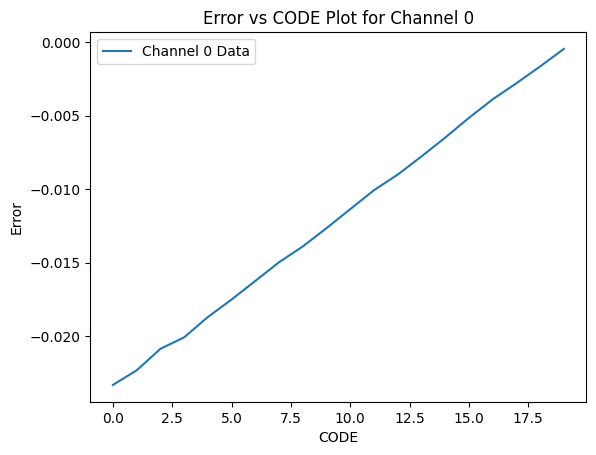

1
Writing data 0.0: 0.0
Measurement outputs : -11.2418
Expected Output : -11.249923706054688
Writing data 3449.2105263157896: 3449.2105263157896
Measurement outputs : -10.0582
Expected Output : -10.065731249357523
Writing data 6898.421052631579: 6898.421052631579
Measurement outputs : -8.87487
Expected Output : -8.881538792660361
Writing data 10347.631578947368: 10347.631578947368
Measurement outputs : -7.69099
Expected Output : -7.697346335963199
Writing data 13796.842105263158: 13796.842105263158
Measurement outputs : -6.50774
Expected Output : -6.513153879266036
Writing data 17246.052631578947: 17246.052631578947
Measurement outputs : -5.32431
Expected Output : -5.328961422568874
Writing data 20695.263157894737: 20695.263157894737
Measurement outputs : -4.14083
Expected Output : -4.144768965871711
Writing data 24144.473684210527: 24144.473684210527
Measurement outputs : -2.95743
Expected Output : -2.9605765091745475
Writing data 27593.684210526317: 27593.684210526317
Measurement out

KeyboardInterrupt: 

In [19]:
# FV Full program

from keithley2600 import Keithley2600
from pmu_som import communicator, pmu_ctrl, pmu_cal
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd


try:
    del(p.c)
except:
    pass

k = Keithley2600('GPIB0::17::INSTR', visa_library='')
#k.smua.source.output = k.smua.OUTPUT_OFF

k.smua.reset()
k.smub.reset()

# p = communicator.communicator(False)
p = pmu_ctrl.pmu()

### all channels of PMU turnoff

for channel in p.channels:
    channel.change_pmu_reg({"CH EN": 0})
p.decode_pmu_reg()

## SMU and PMU Setup

p.write_all_PMU_REGS(0x1E060)

k.display.screen            = k.display.SMUA
k.display.smua.measure.func = k.display.MEASURE_DCVOLTS
    
k.smua.measure.rangev       = 20
k.smua.measure.autorangei   = k.smua.AUTORANGE_ON
#k.smua.measure.autorangev   = k.smua.AUTORANGE_ON
k.smua.measure.nplc         = 1    
k.smua.source.func          = k.smua.OUTPUT_DCAMPS
k.smua.source.leveli        = 0
k.smua.source.limiti        = 1e-3
k.smua.source.limitv        = 20
k.smua.source.output        = k.smua.OUTPUT_ON

p.change_sys_ctrl({
        "DUTGND/CH" : 1,
        "INT10K"    : 1,
        "GAIN"      : 2,
        "TMP ENABLE": 1,
        "TMP"       : 3, # Thermal shutdown at 100°C
        "CL": 1
    })

p.decode_pmu_reg()

for ch in range(4):
    p.channels[ch].change_pmu_reg({

    "SS0"   : 0,
    "SF0"   : 0  #1,1

    })
p.decode_sys_ctrl()

import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty list to store individual DataFrames
all_dataframes = []

# Add for loop for ch
for ch in range(4):
    print(ch)
  #  p.write_all_PMU_REGS(0x21fc60)
    
    #p.channels[ch].change_pmu_reg = 0x21fc60
    
    #Change PMU register settings for the current channel
    p.channels[ch].change_pmu_reg({
        "CH EN": 1,      # Channel enable
        "FORCE": 0,      # FV
        "C": 3,
        "MEAS": 3,       # VSens
        "SS0": 1,
        "SF0": 1,        # 1,1
        "FIN": 1,
         "CL": 1
    })
        
    # Enable beeper and play chord
    k.beeper.enable = k.beeper.ON
    k.play_chord(notes=("G6", "F6", "C6", "C6"), durations=0.1)
    k.beeper.enable = k.beeper.OFF
    k.smua.source.output = k.smua.OUTPUT_ON

    data_list = []
    measure_points = np.linspace(0, 0xFFFF, 20)
    

    # Calculate the step size to generate 20 equidistant data points
   # step_size = 0xFFFF // 19

    # Loop to generate and write equidistant data points
    for d in  measure_points:
        # Calculate the data value for the current index
       # data = i * step_size

        # Print the data being written to the DAC register
        print(f"Writing data {d }: {(d)}")

        # Write the data to the DAC register
        p.channels[ch].write_dac(
            data=round(d),
            dac_reg="FIN_U",
            reg="X1"
        )

        # Perform measurement after writing to the DAC register
        

        iv_data = k.smua.measure.v()
        V_REF = 5

        # Print the measurement outputs
        print(f"Measurement outputs : {iv_data}")

        # Calculate expected output and error
      
        VOUT = ((4.5 * d) - (3.5 * 42130)) * (V_REF / (2**16))
        error = VOUT - iv_data
        print(f"Expected Output : {VOUT}")

        # Append data to the list
        data_list.append({"CODE": (d), "VOUT - EXPECTED": VOUT, "VOUT-RESULT": iv_data, "Error": error})
        sleep(.5)

    # Create a DataFrame for the current channel
    data_df = pd.DataFrame(data_list)

    # Append the DataFrame to the list of all DataFrames
    all_dataframes.append(data_df)

    # Display the DataFrame
    print("\nData stored in DataFrame:")
    print(data_df)

    # Plot the data for the current channel
    plt.plot(data_df.index, data_df["Error"], label=f"Channel {ch} Data", linestyle='-')

    # Add legend and labels
    plt.xlabel("CODE")
    plt.ylabel("Error")
    plt.title(f"Error vs CODE Plot for Channel {ch}")
    plt.legend()

    # Show the plot
    plt.show()
    k.smua.source.output = k.smua.OUTPUT_OFF
    p.channels[ch].change_pmu_reg({
        "CH EN": 0
        })



    

    # Change PMU register settings for the current channel
    p.channels[ch].change_pmu_reg({
        "SS0": 0,
        "SF0": 0,
    })
    
    sleep(2)
    

# Concatenate all individual DataFrames into a single DataFrame
all_data_df = pd.concat(all_dataframes)

# Display the new DataFrame
print("\nNew DataFrame containing values of all four previous DataFrames:")
print(all_data_df)

# Plot comparing all the other four plots
for df in all_dataframes:
    plt.plot(df.index, df["Error"], linestyle='-')

# Add legend and labels
plt.xlabel("CODE")
plt.ylabel("Error")
plt.title("Comparison of Error vs CODE Plots for All Channels")
plt.legend([f"Channel {i}" for i in range(4)])

# Show the plot

In [1]:
from keithley2600 import Keithley2600
from pmu_som import communicator, pmu_ctrl, pmu_cal
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd


try:
    del(p.c)
except:
    pass

k = Keithley2600('GPIB0::17::INSTR', visa_library='')
#k.smua.source.output = k.smua.OUTPUT_OFF

k.smua.reset()
k.smub.reset()

# p = communicator.communicator(False)
p = pmu_ctrl.pmu()


In [2]:
p.channels[0].change_pmu_reg({
        "CH EN": 1,      # Channel enable
        "FORCE": 0,      # FV
        "C": 3,
        "MEAS": 3,       # VSens
        "SS0": 1,
        "SF0": 1,        # 1,1
        "FIN": 1,
         "CL": 1
    })
        

In [3]:
p.change_sys_ctrl({
        "DUTGND/CH" : 1,
        "INT10K"    : 1,
        "GAIN"      : 2,
        "TMP ENABLE": 1,
        "TMP"       : 3,
        'CL': 1
})

In [4]:
p.decode_sys_ctrl()

{'CL': 1,
 'CPOLH': 0,
 'CPBIASEN': 0,
 'DUTGND/CH': 1,
 'GUARD ALM': 0,
 'CLAMP ALM': 0,
 'INT10K': 1,
 'GUARD EN': 1,
 'GAIN': 2,
 'TMP ENABLE': 1,
 'TMP': 3,
 'LATCHED': 0}

In [5]:
p.decode_pmu_reg()

,CH EN,FORCE,C,MEAS,FIN,SF0,SS0,CL,CPOLH,COMPARE V/I,LTMPALMn,TMPALMn
0,1,0,3,3,1,1,1,1,2,0,1,1
1,0,0,3,3,0,0,0,0,0,0,1,1
2,0,0,3,3,0,0,0,0,0,0,1,1
3,0,0,3,3,0,0,0,0,0,0,1,1


In [6]:
p.write_all_PMU_REGS(0x1E060)

k.display.screen            = k.display.SMUA
k.display.smua.measure.func = k.display.MEASURE_DCVOLTS
    
k.smua.measure.rangev       = 20
k.smua.measure.autorangei   = k.smua.AUTORANGE_ON
#k.smua.measure.autorangev   = k.smua.AUTORANGE_ON
k.smua.measure.nplc         = 1    
k.smua.source.func          = k.smua.OUTPUT_DCAMPS
k.smua.source.leveli        = 0
k.smua.source.limiti        = 1e-3
k.smua.source.limitv        = 20
k.smua.source.output        = k.smua.OUTPUT_ON


In [7]:
 p.channels[0].write_dac(
            data=0XBCA1,
            dac_reg="CLL_I",
            reg="X1"
        )


In [8]:
p.read_dac_regs(reg="X1")

,Offset,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,42130,32768,32768,32768,32768,32768,32768,48289,0,65535,65535
1,42130,32768,32768,32768,32768,32768,32768,0,0,65535,65535
2,42130,32768,32768,32768,32768,32768,32768,0,0,65535,65535
3,42130,32768,32768,32768,32768,32768,32768,0,0,65535,65535


In [10]:

measure_points = np.linspace(0, 0xFFFF, 20)


for d in measure_points:
    
    print(f"Writing data {d}: {d}")
    p.channels[0].write_dac(
        data=round(d),
        dac_reg="FIN_U",
        reg="X1"
    )

    # Perform measurement after writing to the DAC register
    iv_data = k.smua.measure.v()
  
    print(f"Measurement outputs: {iv_data}")

   
    sleep(0.5)


Writing data 0.0: 0.0
Measurement outputs: -2.43154
Writing data 3449.2105263157896: 3449.2105263157896
Measurement outputs: -2.43319
Writing data 6898.421052631579: 6898.421052631579
Measurement outputs: -2.43361
Writing data 10347.631578947368: 10347.631578947368
Measurement outputs: -2.43531
Writing data 13796.842105263158: 13796.842105263158
Measurement outputs: -2.43659
Writing data 17246.052631578947: 17246.052631578947
Measurement outputs: -2.43792
Writing data 20695.263157894737: 20695.263157894737
Measurement outputs: -2.43901
Writing data 24144.473684210527: 24144.473684210527
Measurement outputs: -2.43999
Writing data 27593.684210526317: 27593.684210526317
Measurement outputs: -2.44092
Writing data 31042.894736842107: 31042.894736842107
Measurement outputs: -2.44211
Writing data 34492.10526315789: 34492.10526315789
Measurement outputs: -2.44302
Writing data 37941.31578947369: 37941.31578947369
Measurement outputs: -2.444
Writing data 41390.52631578947: 41390.52631578947
Meas

0
Writing data 0.0: 0.0
Measurement outputs : -11.2266
Expected Output : -11.249923706054688
Writing data 3449.2105263157896: 3449.2105263157896
Measurement outputs : -10.0435
Expected Output : -10.065731249357523
Writing data 6898.421052631579: 6898.421052631579
Measurement outputs : -8.86064
Expected Output : -8.881538792660361
Writing data 10347.631578947368: 10347.631578947368
Measurement outputs : -7.67725
Expected Output : -7.697346335963199
Writing data 13796.842105263158: 13796.842105263158
Measurement outputs : -6.49434
Expected Output : -6.513153879266036
Writing data 17246.052631578947: 17246.052631578947
Measurement outputs : -5.31138
Expected Output : -5.328961422568874
Writing data 20695.263157894737: 20695.263157894737
Measurement outputs : -4.12845
Expected Output : -4.144768965871711
Writing data 24144.473684210527: 24144.473684210527
Measurement outputs : -2.94546
Expected Output : -2.9605765091745475
Writing data 27593.684210526317: 27593.684210526317
Measurement out

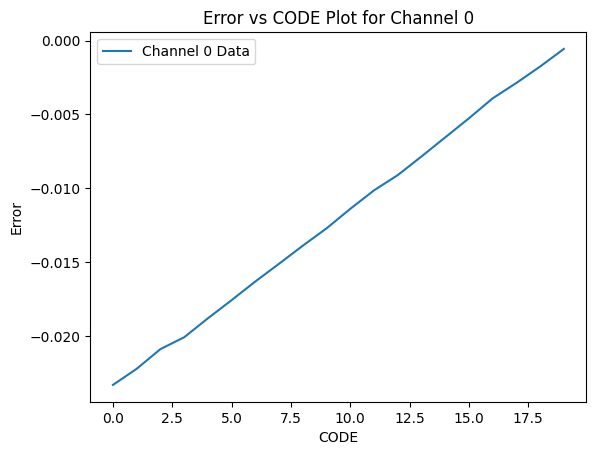

1
Writing data 0.0: 0.0
Measurement outputs : -11.2421
Expected Output : -11.249923706054688
Writing data 3449.2105263157896: 3449.2105263157896
Measurement outputs : -10.0583
Expected Output : -10.065731249357523
Writing data 6898.421052631579: 6898.421052631579
Measurement outputs : -8.87495
Expected Output : -8.881538792660361
Writing data 10347.631578947368: 10347.631578947368
Measurement outputs : -7.69111
Expected Output : -7.697346335963199
Writing data 13796.842105263158: 13796.842105263158
Measurement outputs : -6.5078
Expected Output : -6.513153879266036
Writing data 17246.052631578947: 17246.052631578947
Measurement outputs : -5.32429
Expected Output : -5.328961422568874
Writing data 20695.263157894737: 20695.263157894737
Measurement outputs : -4.14092
Expected Output : -4.144768965871711
Writing data 24144.473684210527: 24144.473684210527
Measurement outputs : -2.9575
Expected Output : -2.9605765091745475
Writing data 27593.684210526317: 27593.684210526317
Measurement outpu

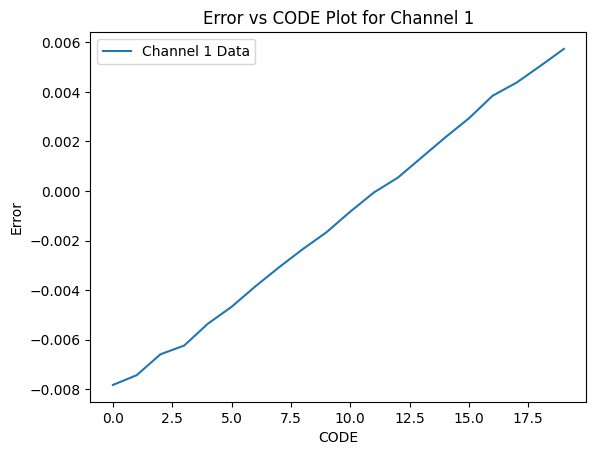

2
Writing data 0.0: 0.0
Measurement outputs : -11.2186
Expected Output : -11.249923706054688
Writing data 3449.2105263157896: 3449.2105263157896
Measurement outputs : -10.0355
Expected Output : -10.065731249357523
Writing data 6898.421052631579: 6898.421052631579
Measurement outputs : -8.85275
Expected Output : -8.881538792660361
Writing data 10347.631578947368: 10347.631578947368
Measurement outputs : -7.66937
Expected Output : -7.697346335963199
Writing data 13796.842105263158: 13796.842105263158
Measurement outputs : -6.4867
Expected Output : -6.513153879266036
Writing data 17246.052631578947: 17246.052631578947
Measurement outputs : -5.30379
Expected Output : -5.328961422568874
Writing data 20695.263157894737: 20695.263157894737
Measurement outputs : -4.12094
Expected Output : -4.144768965871711
Writing data 24144.473684210527: 24144.473684210527
Measurement outputs : -2.93816
Expected Output : -2.9605765091745475
Writing data 27593.684210526317: 27593.684210526317
Measurement outp

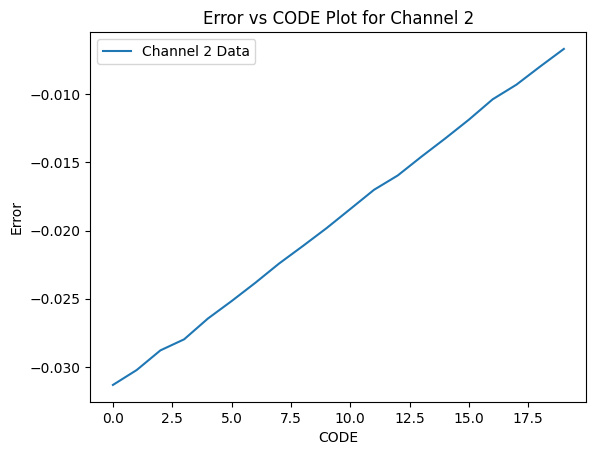

3
Writing data 0.0: 0.0
Measurement outputs : -11.2298
Expected Output : -11.249923706054688
Writing data 3449.2105263157896: 3449.2105263157896
Measurement outputs : -10.0466
Expected Output : -10.065731249357523
Writing data 6898.421052631579: 6898.421052631579
Measurement outputs : -8.86364
Expected Output : -8.881538792660361
Writing data 10347.631578947368: 10347.631578947368
Measurement outputs : -7.68017
Expected Output : -7.697346335963199
Writing data 13796.842105263158: 13796.842105263158
Measurement outputs : -6.49724
Expected Output : -6.513153879266036
Writing data 17246.052631578947: 17246.052631578947
Measurement outputs : -5.31414
Expected Output : -5.328961422568874
Writing data 20695.263157894737: 20695.263157894737
Measurement outputs : -4.13112
Expected Output : -4.144768965871711
Writing data 24144.473684210527: 24144.473684210527
Measurement outputs : -2.94806
Expected Output : -2.9605765091745475
Writing data 27593.684210526317: 27593.684210526317
Measurement out

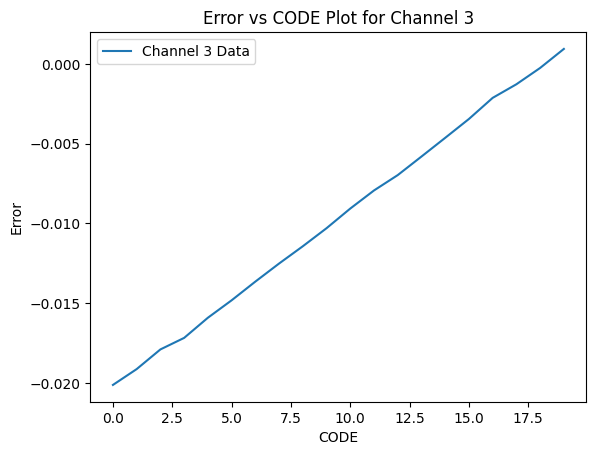


New DataFrame containing values of all four previous DataFrames:
            CODE  VOUT - EXPECTED  VOUT-RESULT     Error
0       0.000000       -11.249924    -11.22660 -0.023324
1    3449.210526       -10.065731    -10.04350 -0.022231
2    6898.421053        -8.881539     -8.86064 -0.020899
3   10347.631579        -7.697346     -7.67725 -0.020096
4   13796.842105        -6.513154     -6.49434 -0.018814
..           ...              ...          ...       ...
15  51738.157895         6.512963      6.51642 -0.003457
16  55187.368421         7.697156      7.69929 -0.002134
17  58636.578947         8.881348      8.88263 -0.001282
18  62085.789474        10.065541     10.06580 -0.000259
19  65535.000000        11.249733     11.24880  0.000933

[80 rows x 4 columns]


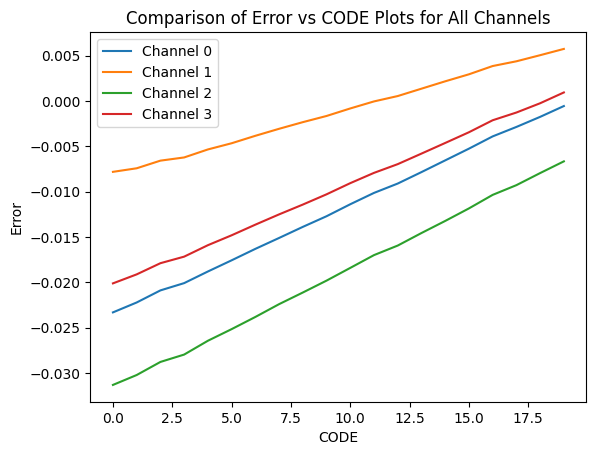

In [2]:

# FV Full program

from keithley2600 import Keithley2600
from pmu_som import communicator, pmu_ctrl, pmu_cal
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd


try:
    del(p.c)
except:
    pass

k = Keithley2600('GPIB0::17::INSTR', visa_library='')
#k.smua.source.output = k.smua.OUTPUT_OFF

k.smua.reset()
k.smub.reset()

# p = communicator.communicator(False)
p = pmu_ctrl.pmu()

### all channels of PMU turnoff

for channel in p.channels:
    channel.change_pmu_reg({"CH EN": 0})
p.decode_pmu_reg()

## SMU and PMU Setup

p.write_all_PMU_REGS(0x1E060)

k.display.screen            = k.display.SMUA
k.display.smua.measure.func = k.display.MEASURE_DCVOLTS
    
k.smua.measure.rangev       = 20
k.smua.measure.autorangei   = k.smua.AUTORANGE_ON
#k.smua.measure.autorangev   = k.smua.AUTORANGE_ON
k.smua.measure.nplc         = 1    
k.smua.source.func          = k.smua.OUTPUT_DCAMPS
k.smua.source.leveli        = 0
k.smua.source.limiti        = 1e-3
k.smua.source.limitv        = 20
k.smua.source.output        = k.smua.OUTPUT_ON

p.change_sys_ctrl({
        "DUTGND/CH" : 1,
        "INT10K"    : 1,
        "GAIN"      : 2,
        "TMP ENABLE": 1,
        "TMP"       : 3, # Thermal shutdown at 100°C
        "CL": 1
    
    })

p.decode_pmu_reg()

for ch in range(4):
    p.channels[ch].change_pmu_reg({

    "SS0"   : 0,
    "SF0"   : 0  #1,1

    })
p.decode_sys_ctrl()

import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty list to store individual DataFrames
all_dataframes = []
for ch in range(4):
    p.channels[ch].write_dac(
    data=0x8000,
    dac_reg="CLL_I",
    reg="X1"
         )
    sleep(0.5)


# Add for loop for ch
for ch in range(4):
    print(ch)
  #  p.write_all_PMU_REGS(0x21fc60)
    
    #p.channels[ch].change_pmu_reg = 0x21fc60
    
    #Change PMU register settings for the current channel
    p.channels[ch].change_pmu_reg({
        "CH EN": 1,      # Channel enable
        "FORCE": 0,      # FV
        "C": 3,
        "MEAS": 3,       # VSens
        "SS0": 1,
        "SF0": 1,        # 1,1
        "FIN": 1,
        "CL": 1
    })
        
    # Enable beeper and play chord
    k.beeper.enable = k.beeper.ON
    k.play_chord(notes=("G6", "F6", "C6", "C6"), durations=0.1)
    k.beeper.enable = k.beeper.OFF
    k.smua.source.output = k.smua.OUTPUT_ON

    data_list = []
    measure_points = np.linspace(0, 0xFFFF, 20)
    

    # Calculate the step size to generate 20 equidistant data points
   # step_size = 0xFFFF // 19

    # Loop to generate and write equidistant data points
    for d in  measure_points:
        # Calculate the data value for the current index
       # data = i * step_size

        # Print the data being written to the DAC register
        print(f"Writing data {d }: {(d)}")

        # Write the data to the DAC register
        p.channels[ch].write_dac(
            data=round(d),
            dac_reg="FIN_U",
            reg="X1"
        )

        # Perform measurement after writing to the DAC register
        sleep(0.5)

        iv_data = k.smua.measure.v()
        V_REF = 5

        # Print the measurement outputs
        print(f"Measurement outputs : {iv_data}")

        # Calculate expected output and error
      
        VOUT = ((4.5 * d) - (3.5 * 42130)) * (V_REF / (2**16))
        error = VOUT - iv_data
        print(f"Expected Output : {VOUT}")

        # Append data to the list
        data_list.append({"CODE": (d), "VOUT - EXPECTED": VOUT, "VOUT-RESULT": iv_data, "Error": error})

    # Create a DataFrame for the current channel
    data_df = pd.DataFrame(data_list)

    # Append the DataFrame to the list of all DataFrames
    all_dataframes.append(data_df)

    # Display the DataFrame
    print("\nData stored in DataFrame:")
    print(data_df)

    # Plot the data for the current channel
    plt.plot(data_df.index, data_df["Error"], label=f"Channel {ch} Data", linestyle='-')

    # Add legend and labels
    plt.xlabel("CODE")
    plt.ylabel("Error")
    plt.title(f"Error vs CODE Plot for Channel {ch}")
    plt.legend()

    # Show the plot
    plt.show()
    k.smua.source.output = k.smua.OUTPUT_OFF
    p.channels[ch].change_pmu_reg({
        "CH EN": 0
        })



    

    # Change PMU register settings for the current channel
    p.channels[ch].change_pmu_reg({
        "SS0": 0,
        "SF0": 0,
    })
    
    sleep(2)
    

# Concatenate all individual DataFrames into a single DataFrame
all_data_df = pd.concat(all_dataframes)

# Display the new DataFrame
print("\nNew DataFrame containing values of all four previous DataFrames:")
print(all_data_df)

# Plot comparing all the other four plots
for df in all_dataframes:
    plt.plot(df.index, df["Error"], linestyle='-')

# Add legend and labels
plt.xlabel("CODE")
plt.ylabel("Error")
plt.title("Comparison of Error vs CODE Plots for All Channels")
plt.legend([f"Channel {i}" for i in range(4)])

# Show the plot